# Class Mean PCA

> Examining the space spanned by the class means in feature space

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
from sklearn.decomposition import PCA
from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def pca(dls, fe):
    class_ftrs = ClassFeatures.compute(dls.train, fe)
    class_means_stacked = torch.stack([cf.centroid for cf in class_ftrs.values()]).cpu()
    pca = PCA()
    pca.fit(class_means_stacked)

    plt.yscale('log')
    plt.ylabel('Explained Variance Fraction')
    plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
    plt.axhline(1/pca.n_components_, label=r'$\frac{1}{\mathrm{\# components}}$')
    plt.legend()

In [ ]:
vggface2_fe = FaceNetInceptionResnetV1('vggface2', classify=False)
casia_webface_fe = FaceNetInceptionResnetV1('casia-webface', classify=False)

lfw_dls = dls = LFWPeople().dev().dls()
pfr_dls = PinterestFaces(splitter=lambda items: (range_of(items), [])).dls()

## VGGFace2

### LFW

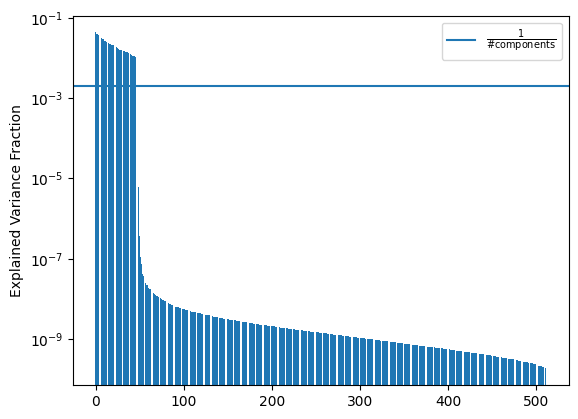

In [ ]:
pca(lfw_dls, vggface2_fe)

### PFR

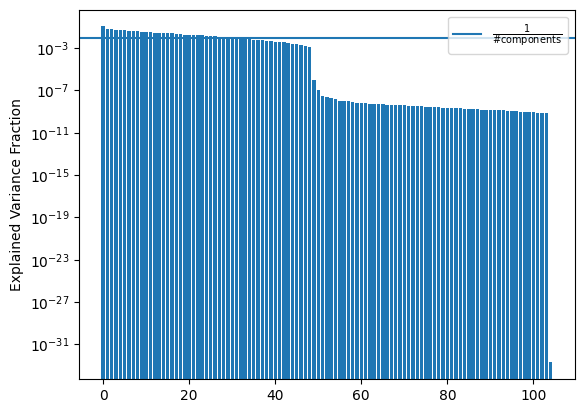

In [ ]:
pca(pfr_dls, vggface2_fe)

## CASIA-WebFace

### LFW

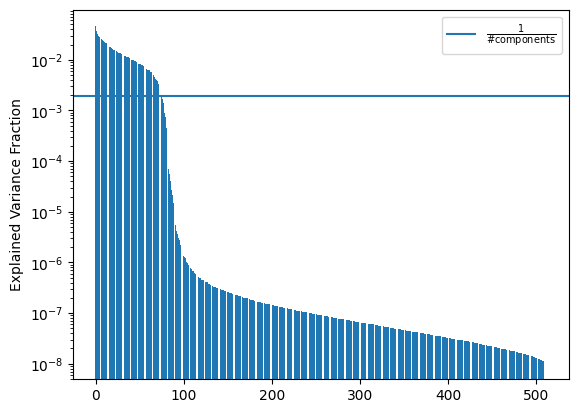

In [ ]:
pca(lfw_dls, casia_webface_fe)

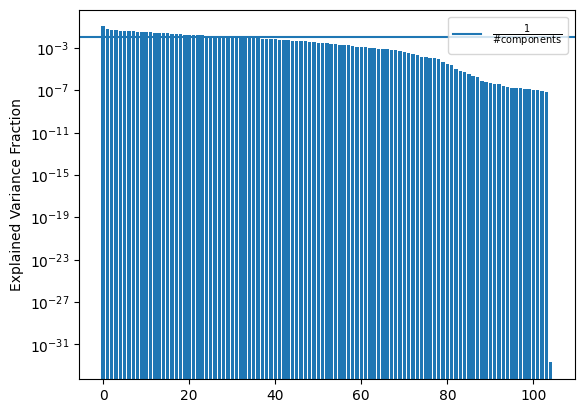

In [ ]:
pca(pfr_dls, casia_webface_fe)